# Sparkify Project (2/2) - Evaluation

This is the second Notebook of the Sparkify project. The purpose is an evaluation and visualization of the machine learning evaluation results that were created by the AWS Stepfunctions.

In [1]:
%matplotlib inline

In [55]:
# import libraries

import boto3
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Model Evaluation and Validation

The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.

Alternatively a student may choose to answer questions with data visualizations or other means that don't involve machine learning if a different approach best helps them address their question(s) of interest.

In [10]:
# Name of the S3 Bucket used for the AWS Stepfunction execution
bucket = "sparkify-pmarcus"
s3 = boto3.resource('s3')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [88]:
# Read in the data
results = []

for algo in ["svm", "lr", "nb", "rf"]:
    print("-- reading {} evaluation results --".format(algo))
    obj = s3.Object(bucket, 'models/{}/evaluation_results.json'.format(algo))
    data = obj.get()['Body'].read()
    record = json.loads(data)
    
    #Append the name of the used algorithm
    record['Algorithm'] = algo
    results.append(record)

# Create a DataFrame and rename the columns
metrics_df = pd.DataFrame(results)
metrics_df.columns = ['Path', 'Recall', 'Precision', 'Accuracy', 'F1', 'Algorithm']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-- reading svm evaluation results --
-- reading lr evaluation results --
-- reading nb evaluation results --
-- reading rf evaluation results --

In [89]:
metrics_df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                Path    Recall  ...        F1  Algorithm
0  s3://sparkify-pmarcus/models/svm/  0.803992  ...  0.803678        svm
1   s3://sparkify-pmarcus/models/lr/  0.802572  ...  0.802367         lr
2   s3://sparkify-pmarcus/models/nb/  0.630586  ...  0.594386         nb
3   s3://sparkify-pmarcus/models/rf/  0.820180  ...  0.820135         rf

[4 rows x 6 columns]

In [93]:
# drop the model path as we don`t need it for the evaluation
metrics_df = metrics_df.drop(columns=['Path'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
metrics_df_melted = metrics_df.melt(id_vars="Algorithm")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [95]:
metrics_df_melted

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Algorithm   variable     value
0        svm     Recall  0.803992
1         lr     Recall  0.802572
2         nb     Recall  0.630586
3         rf     Recall  0.820180
4        svm  Precision  0.805989
5         lr  Precision  0.803862
6         nb  Precision  0.703443
7         rf  Precision  0.820513
8        svm   Accuracy  0.803992
9         lr   Accuracy  0.802572
10        nb   Accuracy  0.630586
11        rf   Accuracy  0.820180
12       svm         F1  0.803678
13        lr         F1  0.802367
14        nb         F1  0.594386
15        rf         F1  0.820135

In [96]:
metrics_df_melted.rename(columns={'variable':"Metric",
                                  'value':"Score"},
                        inplace=True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [104]:
metrics_df_melted

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Algorithm     Metric     Score
0        svm     Recall  0.803992
1         lr     Recall  0.802572
2         nb     Recall  0.630586
3         rf     Recall  0.820180
4        svm  Precision  0.805989
5         lr  Precision  0.803862
6         nb  Precision  0.703443
7         rf  Precision  0.820513
8        svm   Accuracy  0.803992
9         lr   Accuracy  0.802572
10        nb   Accuracy  0.630586
11        rf   Accuracy  0.820180
12       svm         F1  0.803678
13        lr         F1  0.802367
14        nb         F1  0.594386
15        rf         F1  0.820135

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

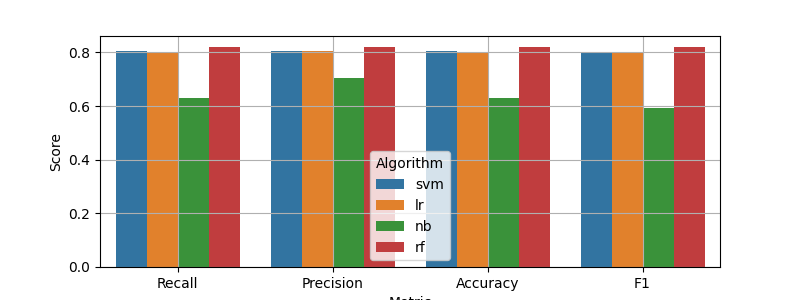

In [100]:
fig = plt.figure(figsize=(8,3))
ax = sns.barplot(x="Metric", y="Score", hue="Algorithm", data=metrics_df_melted)
plt.grid("on")
%matplot plt

The results show, that all models except for Naive Bayes performed with an Precision and Recall of approx. 80%. The Random Forest algorithm tends to win here, with an F1 score of 82%, compared to SVM and Logistic Regression, both with 80%. One 

Alternatively, it could also be tried out to drop features with a low importance and use larger parameter grids for optimization. The importance of features can be analyzed for example based on a decision tree, or the general feature importance score of other classifiers.

# Summary

In this project, a end-to-end machine learning pipeline based on Apache Spark was created in order to detect users that might cancel their subscription with a fictional music streaming service called Sparkify. This analysis was done based on a event log that spans 60 days - as the analysis was conducted on an AWS EMR cluster, the full data set was used. After cleaning the data and extracting features, several machine learning algorithms were evaluated. Here it turned out, that overfitting occurred due to the small size of the data set and the many features used and further evaluation on the full data set is required.

The set up of the AWS EMR cluster and the used AWS Stepfunctions turned out to be very helpful, as results get replicable. The created Stepfunctions could also be used in a productive machine learning workflow, that triggers for example once a day to detect potentially canceling users.

A particular challenge with the data set was the highly imbalanced classes of loyal and churned users, which could lead to a biased classifier. This problem was tackled by weighting the instance samples, so that the instance weights in each class sum up to 0.5. Alternatively, up-sampling of the churned users could be applied by duplicating or slightly modifying existing entries.

Also it was challenging to detect features that contribute to a correct classification result on the one side and can be efficiently computed on the other side. 

In the next steps, several improvements need to be applied to the project, first of all to down-select the most important features and extend the parameter grid for optimizing the results.